In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# use relative path to current directory
DIR = os.path.join(os.getcwd()) + "\\"
print(DIR)
data = np.load(DIR + "sensitivity_S3_dist_400mm.npz")
print(data.files)


c:\Users\crendon\Documents\Github\codev_python_com\sensitivity_analysis\
['epsilon', 'powers', 'dist']


In [4]:
# read the npz files in the directory
surfaces = ["S3", "S7", "S9", "S12", "S22", "S26", "S29"]
distances = [400, 500, 600, 700, 800, 2000, 3750]

data = []

# load the data, the files are named as 'sensitivity_<surface>_dist_<distance>mm.npz'
for s in surfaces:
    surf = {"s": s, "distances": []}
    for d in distances:
        filename = f"sensitivity_{s}_dist_{d}mm.npz"
        if os.path.exists(filename):
            with np.load(filename) as f:
                surf["distances"].append({"d": d, "epsilon": f["epsilon"], "powers": f["powers"]})
    data.append(surf)
print(data)

[{'s': 'S3', 'distances': [{'d': 400, 'epsilon': array([-0.003     , -0.00257143, -0.00214286, -0.00171429, -0.00128571,
       -0.00085714, -0.00042857,  0.        ,  0.00042857,  0.00085714,
        0.00128571,  0.00171429,  0.00214286,  0.00257143,  0.003     ]), 'powers': array([1.83815412, 1.95231504, 1.93757573, 1.90116872, 1.86176577,
       1.82180061, 1.78146383, 1.74087238, 1.70001367, 1.65889845,
       1.61754252, 1.57596888, 1.5341534 , 1.49215557, 1.44997824])}, {'d': 500, 'epsilon': array([-0.003     , -0.00257143, -0.00214286, -0.00171429, -0.00128571,
       -0.00085714, -0.00042857,  0.        ,  0.00042857,  0.00085714,
        0.00128571,  0.00171429,  0.00214286,  0.00257143,  0.003     ]), 'powers': array([1.62451804, 1.60366863, 1.5633532 , 1.52163867, 1.47968802,
       1.43755979, 1.39592314, 1.35415936, 1.31198977, 1.26956971,
       1.22701691, 1.18441825, 1.14183307, 1.0993029 , 1.05685239])}, {'d': 600, 'epsilon': array([-0.003     , -0.00257143, -0.0021428

In [6]:
# Start by the original curve
d = np.linspace(0.4, 4, 100)  # distance in meters
P = 9 / (16 * (d - 0.075))

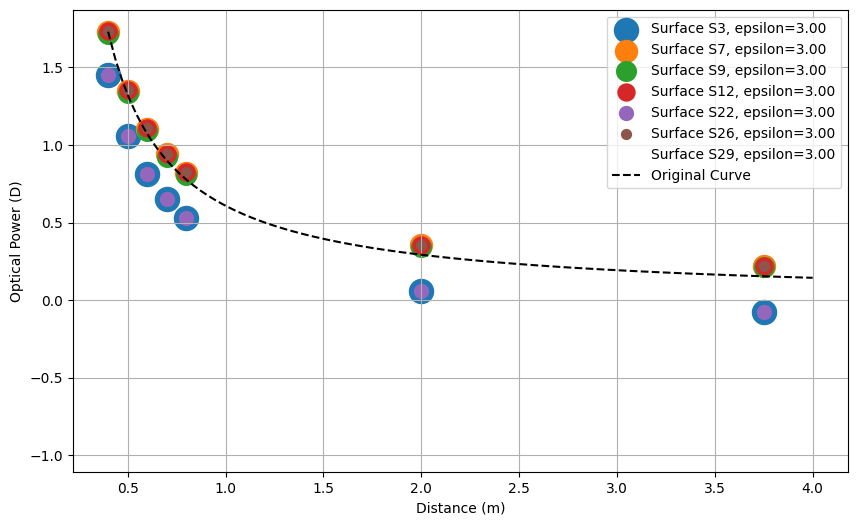

In [19]:
# for a value of epsilon, plot the power vs distance for each surface
plt.figure(figsize=(10, 6))
position = -1
i = len(surfaces)*5
for s in data:
    distances = []
    powers = []
    epsilons = []
    
    for dist_data in s["distances"]:
        d_m = dist_data["d"] / 1000  # convert to meters
        power = dist_data["powers"][position]
        epsilon = dist_data["epsilon"][position] * 1000 # convert to mm
        distances.append(d_m)
        powers.append(power)
        epsilons.append(epsilon)
    i -= 5

    plt.scatter(distances, powers, marker='o', s=10*i,label=f'Surface {s["s"]}, epsilon={epsilons[0]:.2f}')
plt.plot(d, P, label='Original Curve', color='black', linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Distance (m)')
plt.ylabel('Optical Power (D)')
plt.show()

